<a href="https://colab.research.google.com/github/vlarobbyk/ann-basic-example/blob/master/Ejemplo_5_RNA_Deep_Learning_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo de preprocesamiento de datos usando Pandas

En este cuaderno se provee un ejemplo básico en relación al proceso que se realiza para cargar un corpus de datos y preprocesarlo como paso previo a alimentar a una Red Neuronal Artificial.

In [2]:
import pandas as pd # Importamos el paquete Pandas
import numpy as np

# Cómo conectar el cuaderno a la la Unidad de Google Drive
import os

# Importamos el paquete propio de Google Colab para acceder a la Unidad
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## Carga del corpus empleando Google Drive

In [4]:
#!pip install ....

# Realizamos la lectura del archivo de datos y lo almacenamos como una variable de tipo dataframe

df = pd.read_csv('/content/drive/MyDrive/UPS/Periodo-Marzo-Agosto-2021/Inteligencia-Artificial-II/Ejemplo-5-Red-Neuronal-Deep-Learning-Keras-Visualización-Curvas-de-Error/corpus/vehiculos.data', header = None)

df.columns = ['precio','precio_mantenimiento','puertas','personas','cajuela','seguridad','clase']

df.head()

,precio,precio_mantenimiento,puertas,personas,cajuela,seguridad,clase
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


## Carga del corpus empleando GitHub

In [6]:
url = 'https://raw.githubusercontent.com/vlarobbyk/ann-basic-example/master/corpus/vehiculos.data'

df = pd.read_csv(url, header = None)

df.columns = ['precio','precio_mantenimiento','puertas','personas','cajuela','seguridad','clase']

df.head()

# El límite para leer archivos desde GitHub es de 25 Mb

,precio,precio_mantenimiento,puertas,personas,cajuela,seguridad,clase
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Preprocesamiento y análisis de datos

In [7]:
# Primero convertimos la columna en una categoria. Con eso Pandas sabe que la variable tiene niveles o categorías
df['precio'] = df['precio'].astype('category') 
# Substituimos las cadenas por los códigos de las categorías
df['precio'] = df['precio'].cat.codes+1

df['precio_mantenimiento'] = df['precio_mantenimiento'].astype('category') 
df['precio_mantenimiento'] = df['precio_mantenimiento'].cat.codes


df['cajuela'] = df['cajuela'].astype('category') 
df['cajuela'] = df['cajuela'].cat.codes+1

df['seguridad'] = df['seguridad'].astype('category') 
df['seguridad'] = df['seguridad'].cat.codes+1

df['clase'] = df['clase'].astype('category') 
df['clase'] = df['clase'].cat.codes+1

df['puertas'] = df['puertas'].astype('category') 
df['puertas'] = df['puertas'].cat.codes+1

df['personas'] = df['personas'].astype('category') 
df['personas'] = df['personas'].cat.codes+1

In [8]:
# Otra forma de convertir variables categóricas en numéricas
# codigos = {'vhigh':1, 'high':2, 'med':3, 'low':4}
# df['precio'] = df['precio'].map(codigos)

df.head()

,precio,precio_mantenimiento,puertas,personas,cajuela,seguridad,clase
0,4,3,1,1,3,2,3
1,4,3,1,1,3,3,3
2,4,3,1,1,3,1,3
3,4,3,1,1,2,2,3
4,4,3,1,1,2,3,3


## Análisis de correlación existente entre las variables del corpus

In [9]:
import seaborn as sn
import matplotlib.pyplot as pp

# Libería para generar gráficos avanzados:
# https://altair-viz.github.io/

# Cálculo de la matriz de correlación
matriz_corr = df.corr()

matriz_corr

,precio,precio_mantenimiento,puertas,personas,cajuela,seguridad,clase
precio,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.051424
precio_mantenimiento,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.040194
puertas,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-0.031327
personas,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-0.299468
cajuela,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.033184
seguridad,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.021044
clase,0.051424,0.040194,-0.031327,-0.299468,0.033184,-0.021044,1.000000


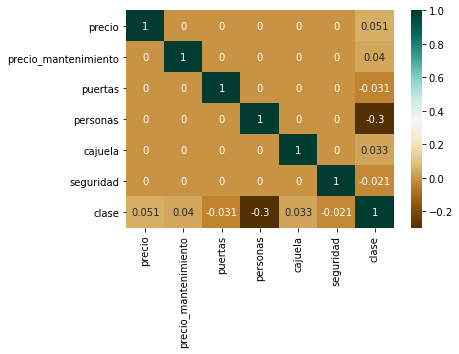

In [10]:
sn.heatmap(matriz_corr, annot = True, cmap = 'BrBG')
pp.show()

# Normalización de los datos usando el paquete scikit-learn

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#datos = df[['precio','puertas']]

datos = df.iloc[:,0:6]
clase = df.iloc[:, 6:7]
#clase.head()

datos.head()

,precio,precio_mantenimiento,puertas,personas,cajuela,seguridad
0,4,3,1,1,3,2
1,4,3,1,1,3,3
2,4,3,1,1,3,1
3,4,3,1,1,2,2
4,4,3,1,1,2,3


In [12]:
# Standard Scaler:
# z = (x - u)/s

scaler = preprocessing.StandardScaler().fit(datos)
datos_escalados = scaler.transform(datos)

print('Media: ',scaler.mean_)

datos_escalados

Media:  [2.5 1.5 2.5 2.  2.  2. ]


array([[ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         0.        ],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
         1.22474487],
       [ 1.34164079,  1.34164079, -1.34164079, -1.22474487,  1.22474487,
        -1.22474487],
       ...,
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         0.        ],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
         1.22474487],
       [-0.4472136 , -0.4472136 ,  1.34164079,  1.22474487, -1.22474487,
        -1.22474487]])

## One Hot Encoding
En este bloque se muestra cómo obtener la codificación "binaria" a partir de un conjunto de valores que tiene la clase

In [13]:
d = pd.get_dummies(df.clase, prefix = 'clase')
d.head()

,clase_1,clase_2,clase_3,clase_4
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


## Separación de los datos en Train y Test
En esta sección se separan los datos en dos partes, una para entrenamiento y otra para pruebas.

El esquema que se usa es 70% para train y 30% para test.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(datos_escalados,d,test_size=0.3, \
                                                   stratify = d, random_state = 73)

y_train.head()
y_train.to_csv('prueba.csv',index = False)

## Entrenamiento de la Red Neuronal
En esta sección se procede a entrenar a la Red Neuronal Artificial en función de los datos que se han preprocesado

In [15]:
mlp = MLPClassifier(hidden_layer_sizes = (10, 7, 4), activation = 'tanh', solver = 'adam', verbose = 10, \
                   random_state = 73, max_iter = 10000)

mlp

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 7, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=73, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

In [16]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 2.49472134
Iteration 2, loss = 2.41542571
Iteration 3, loss = 2.34197231
Iteration 4, loss = 2.27591034
Iteration 5, loss = 2.21549183
Iteration 6, loss = 2.16030950
Iteration 7, loss = 2.11052616
Iteration 8, loss = 2.06385808
Iteration 9, loss = 2.01941370
Iteration 10, loss = 1.97936496
Iteration 11, loss = 1.94163164
Iteration 12, loss = 1.90708456
Iteration 13, loss = 1.87449095
Iteration 14, loss = 1.84376124
Iteration 15, loss = 1.81468743
Iteration 16, loss = 1.78702696
Iteration 17, loss = 1.76180306
Iteration 18, loss = 1.73761885
Iteration 19, loss = 1.71499804
Iteration 20, loss = 1.69363041
Iteration 21, loss = 1.67434500
Iteration 22, loss = 1.65615838
Iteration 23, loss = 1.63921301
Iteration 24, loss = 1.62306847
Iteration 25, loss = 1.60817771
Iteration 26, loss = 1.59374600
Iteration 27, loss = 1.58079093
Iteration 28, loss = 1.56828376
Iteration 29, loss = 1.55682105
Iteration 30, loss = 1.54530075
Iteration 31, loss = 1.53444023
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 7, 4), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=10000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=73, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=10,
              warm_start=False)

### Analizamos qué predice la red con los datos no vistos (X_test, y_test)

In [17]:
y_pred = mlp.predict(X_test)
y_pred

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

### Cálculo de la precisión de la red neuronal artificial
El cálculo se hace a través de la matriz de confusión de la red neuronal

In [18]:
from sklearn.metrics import multilabel_confusion_matrix
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = multilabel_confusion_matrix(y_pred, y_test)

acc = accuracy_score(y_test, y_pred)

print('Precisión de la RNA MLPClassifier: % 2.3f' % acc)

Precisión de la RNA MLPClassifier:  0.929


In [19]:
cm

array([[[384,   7],
        [ 20, 108]],

       [[498,  21],
        [  0,   0]],

       [[154,   5],
        [  2, 358]],

       [[496,   4],
        [  3,  16]]])

# Red Neuronal SEQUENTIAL creada con KERAS

In [20]:
# Importación de las librerías
from keras.models import Sequential
from keras.layers import Dense

In [47]:
model = Sequential()
model.add(Dense(12, input_dim=6,activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(4, activation='softmax')) # Usamos la función de activación 'softmax' ya que estamos trabajando con One Hot Encoding

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

historial = model.fit(x = datos_escalados, y = d, validation_split=0.3, epochs=133, verbose=0)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
{'loss': [1.584208369255066, 1.3279242515563965, 1.192699909210205, 1.05763840675354, 0.8956611752510071, 0.7334620952606201, 0.6252099871635437, 0.5755004286766052, 0.5474697947502136, 0.5298290252685547, 0.5164065361022949, 0.5059571862220764, 0.4971228539943695, 0.4893535375595093, 0.4814854562282562, 0.4750385284423828, 0.4683578908443451, 0.46212297677993774, 0.45606398582458496, 0.4503065347671509, 0.4440610110759735, 0.43730098009109497, 0.43116194009780884, 0.4247431457042694, 0.41737836599349976, 0.41010329127311707, 0.4012591540813446, 0.3921501338481903, 0.37984028458595276, 0.3649347126483917, 0.34832054376602173, 0.3300555348396301, 0.3110601603984833, 0.2913743257522583, 0.27613040804862976, 0.26052308082580566, 0.24410828948020935, 0.23059780895709991, 0.21734754741191864, 0.20625457167625427, 0.1966603547334671, 0.18683406710624695, 0.17751167714595795, 0.17222356796264648, 0.16288141906261444, 0.15500834584236

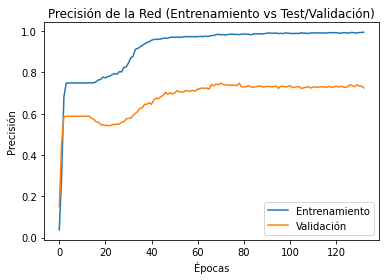

In [48]:
print(historial.history.keys())
#print('Entrenamiento => Precisión: {%2.2f} Loss: {%2.2f}' % (historial.history['accuracy'],historial.history['loss']))
print(historial.history)

import matplotlib.pyplot as pp

%matplotlib inline

pp.plot(historial.history['accuracy'])
pp.plot(historial.history['val_accuracy'])
pp.title('Precisión de la Red (Entrenamiento vs Test/Validación)')
pp.ylabel('Precisión')
pp.xlabel('Épocas')
pp.legend(['Entrenamiento','Validación'], loc='lower right')

pp.show()

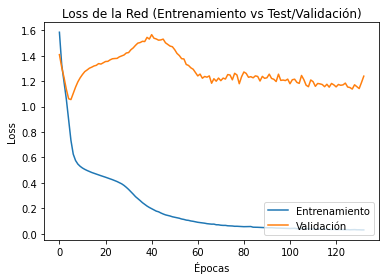

In [49]:
pp.plot(historial.history['loss'])
pp.plot(historial.history['val_loss'])
pp.title('Loss de la Red (Entrenamiento vs Test/Validación)')
pp.ylabel('Loss')
pp.xlabel('Épocas')
pp.legend(['Entrenamiento','Validación'], loc='lower right')

pp.show()

## Entrenar la red neuronal Sequential para predicción

In [51]:
model2 = Sequential()
model2.add(Dense(12, input_dim=6,activation='relu'))
model2.add(Dense(8, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(4, activation='softmax')) # Usamos la función de activación 'softmax' ya que estamos trabajando con One Hot Encoding

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.fit(x = X_train, y = y_train, validation_split=0.3, epochs=133, verbose=0)

In [58]:
prediccions = model.predict_classes(X_test)

y_test.head()


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


,clase_1,clase_2,clase_3,clase_4
725,1,0,0,0
1275,0,0,1,0
844,0,0,1,0
574,0,0,1,0
550,0,0,1,0


In [59]:
prediccions

array([0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 3, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 3, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 0, 3, 2, 2, 2, 2, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 3, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 3, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2,
       2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,